In [104]:
import pandas as pd
from prophet import Prophet

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [106]:
# Python
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [107]:
m = Prophet(holidays=holidays)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

02:15:16 - cmdstanpy - INFO - Chain [1] start processing
02:15:16 - cmdstanpy - INFO - Chain [1] done processing


In [108]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.228031,1.201321
2191,2014-02-03,1.901884,1.451541
2532,2015-01-11,1.228031,0.000000
2533,2015-01-12,1.901884,0.000000
2901,2016-01-17,1.228031,0.000000
2902,2016-01-18,1.901884,0.000000
2908,2016-01-24,1.228031,0.000000
2909,2016-01-25,1.901884,0.000000
2922,2016-02-07,1.228031,1.201321
2923,2016-02-08,1.901884,1.451541


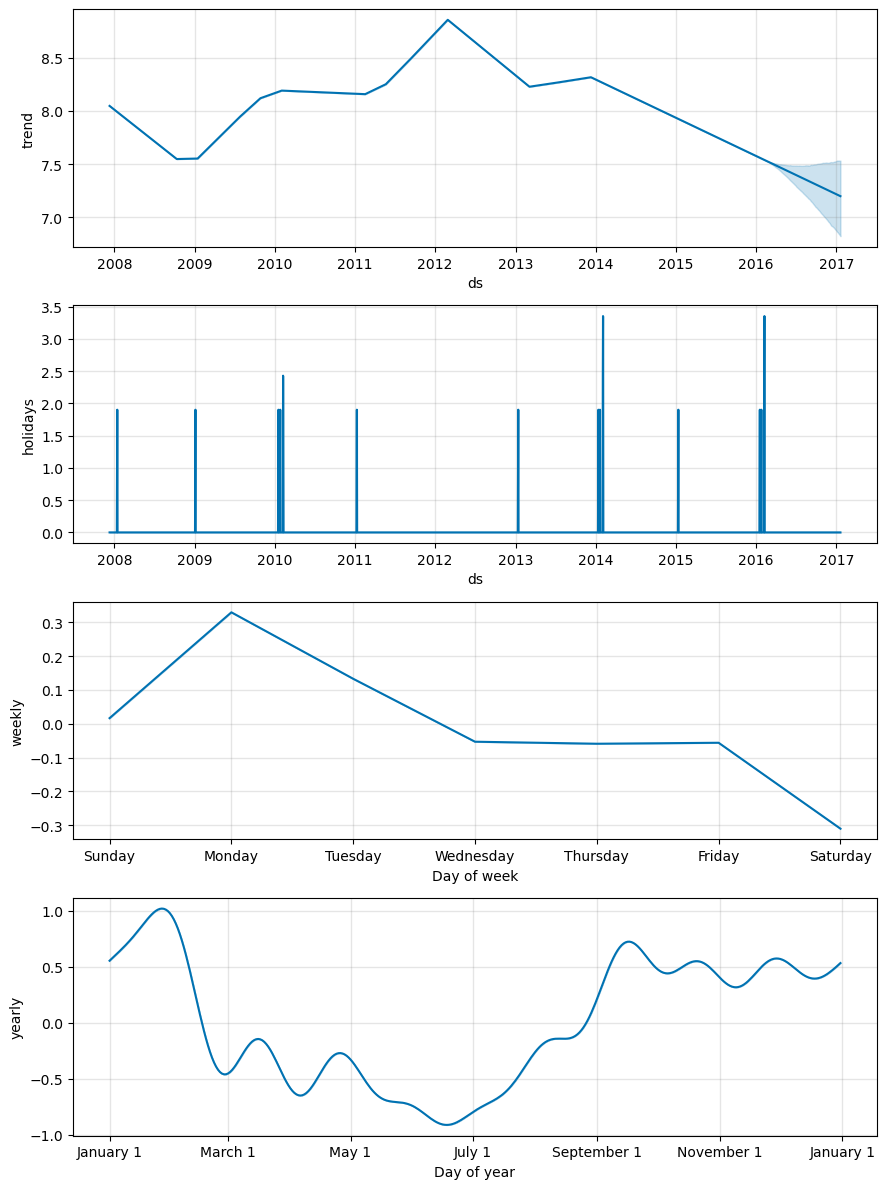

In [109]:
fig = m.plot_components(forecast)

In [110]:
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)

02:15:19 - cmdstanpy - INFO - Chain [1] start processing
02:15:19 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
m.train_holiday_names

0                         playoff
1                       superbowl
2                  New Year's Day
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Veterans Day
7                    Thanksgiving
8                   Christmas Day
9        Christmas Day (observed)
10     Martin Luther King Jr. Day
11          Washington's Birthday
12        Veterans Day (observed)
13    Independence Day (observed)
14      New Year's Day (observed)
dtype: object

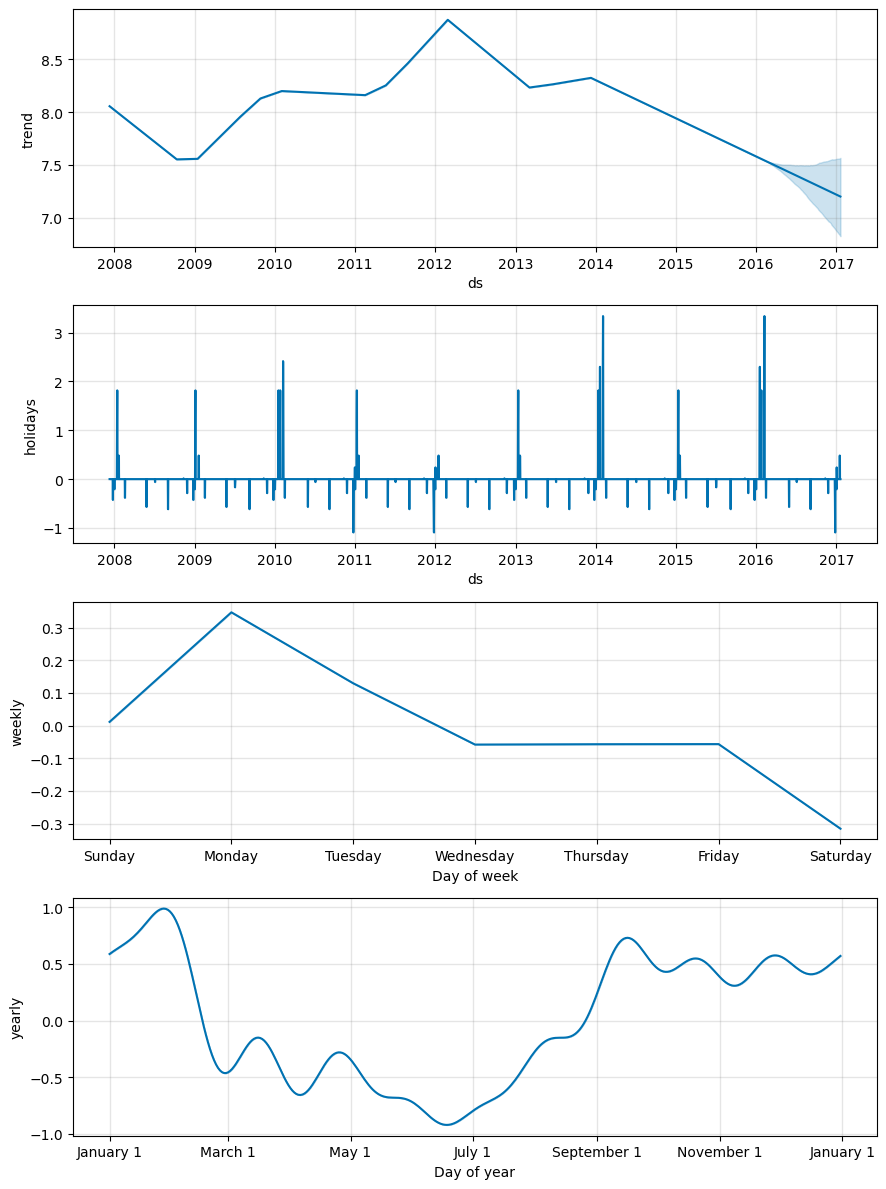

In [112]:
forecast = m.predict(future)
fig = m.plot_components(forecast)


In [113]:
# Python
from prophet.make_holidays import make_holidays_df

nsw_holidays = make_holidays_df(
    year_list=[2019 + i for i in range(10)], country='AU', province='NSW'
)
nsw_holidays.head(n=10)

,ds,holiday
0,2019-04-19,Good Friday
1,2019-04-22,Easter Monday
2,2019-01-01,New Year's Day
3,2019-01-28,Australia Day
4,2019-04-20,Easter Saturday
5,2019-04-21,Easter Sunday
6,2019-04-25,ANZAC Day
7,2019-10-07,Labor Day
8,2019-06-10,Queen's Birthday
9,2019-12-25,Christmas Day


In [114]:
# Python
from prophet import Prophet

m_nsw = Prophet(holidays=nsw_holidays)


02:16:27 - cmdstanpy - INFO - Chain [1] start processing
02:16:28 - cmdstanpy - INFO - Chain [1] done processing


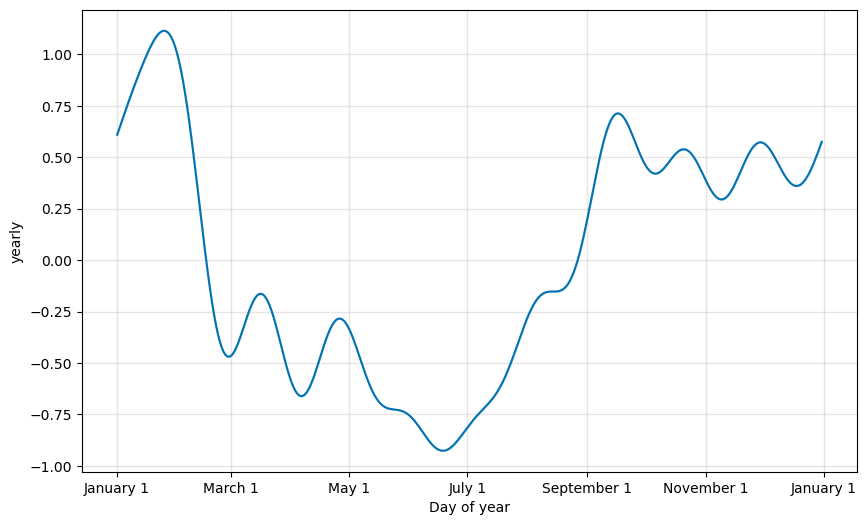

In [115]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

02:16:39 - cmdstanpy - INFO - Chain [1] start processing
02:16:39 - cmdstanpy - INFO - Chain [1] done processing


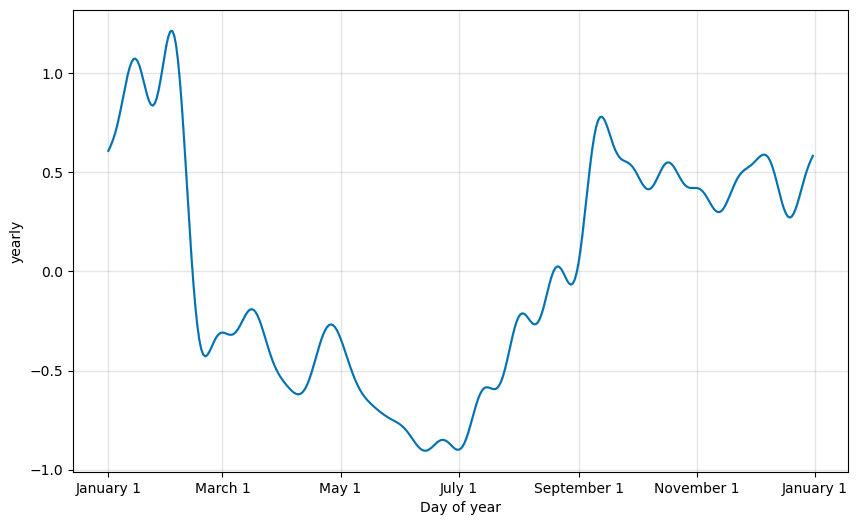

In [116]:
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

02:16:48 - cmdstanpy - INFO - Chain [1] start processing
02:16:49 - cmdstanpy - INFO - Chain [1] done processing


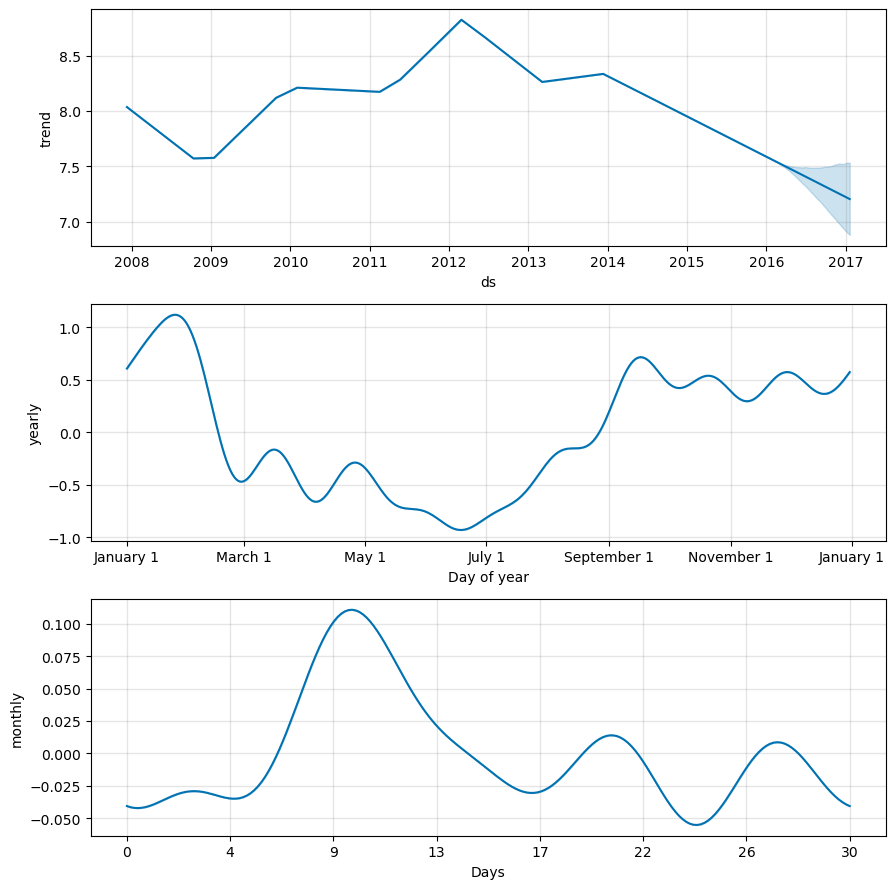

In [117]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

In [118]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)

02:17:17 - cmdstanpy - INFO - Chain [1] start processing
02:17:17 - cmdstanpy - INFO - Chain [1] done processing


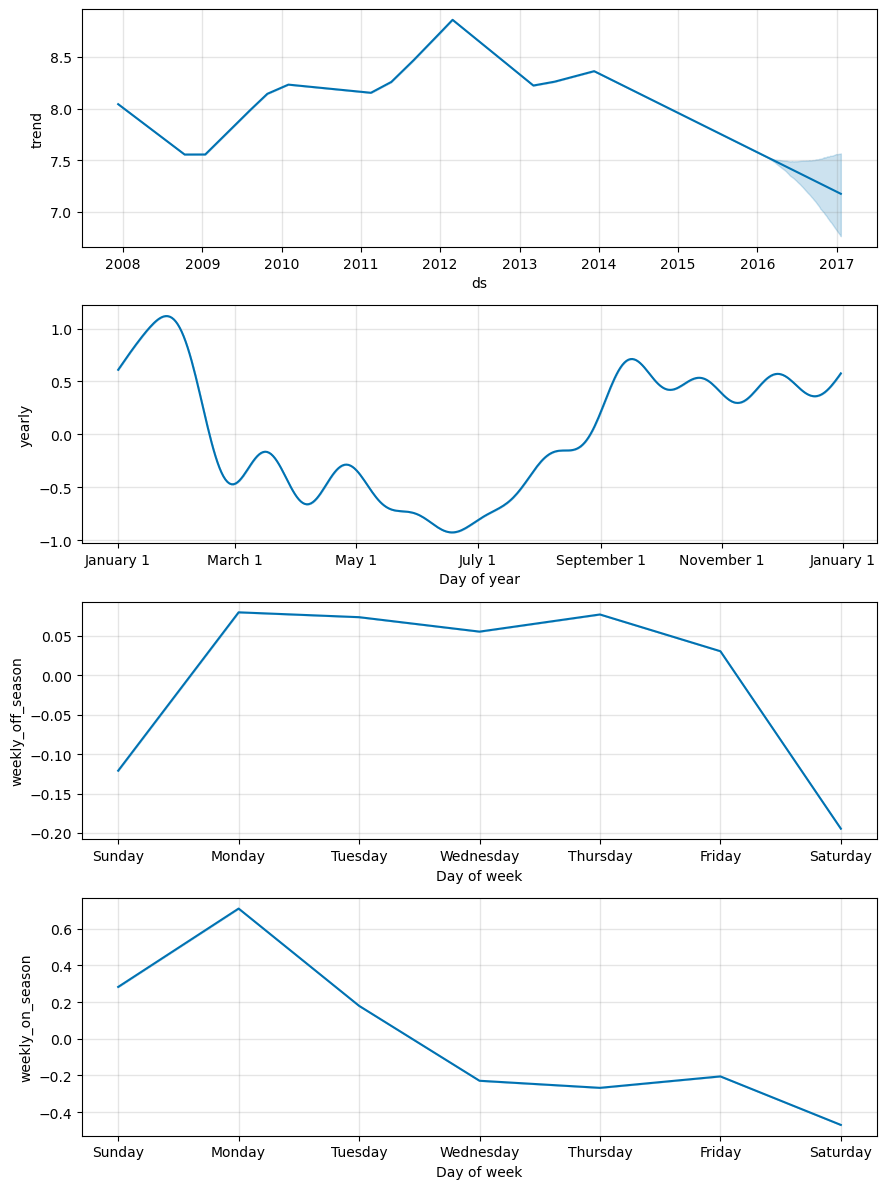

In [119]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

In [120]:
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

02:17:28 - cmdstanpy - INFO - Chain [1] start processing
02:17:29 - cmdstanpy - INFO - Chain [1] done processing


,ds,playoff,superbowl
2190,2014-02-02,1.214551,0.964552
2191,2014-02-03,1.846591,0.991288
2532,2015-01-11,1.214551,0.000000
2533,2015-01-12,1.846591,0.000000
2901,2016-01-17,1.214551,0.000000
2902,2016-01-18,1.846591,0.000000
2908,2016-01-24,1.214551,0.000000
2909,2016-01-25,1.846591,0.000000
2922,2016-02-07,1.214551,0.964552
2923,2016-02-08,1.846591,0.991288


In [121]:
m = Prophet()
m.add_seasonality(
    name='weekly', period=7, fourier_order=3, prior_scale=0.1)

02:17:55 - cmdstanpy - INFO - Chain [1] start processing
02:17:56 - cmdstanpy - INFO - Chain [1] done processing


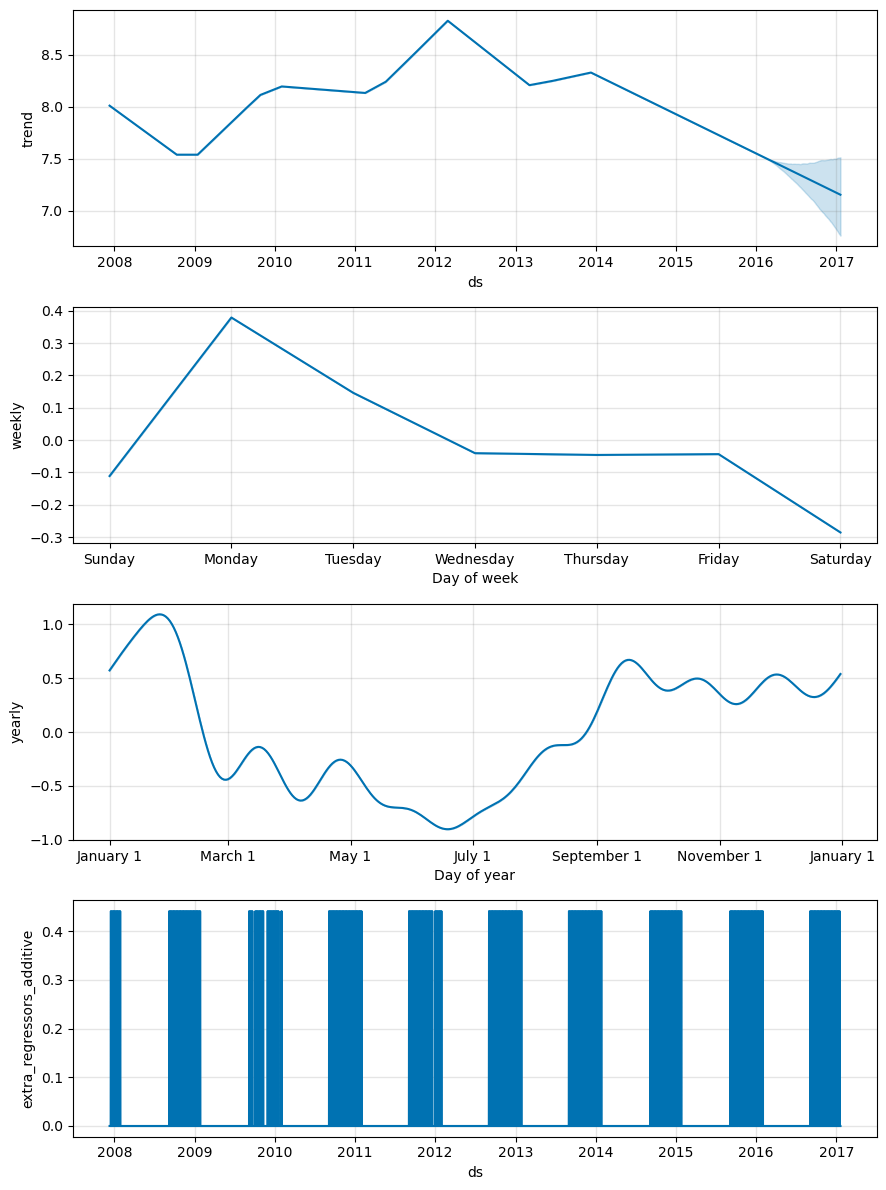

In [122]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)